In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('gasses-2014-2019.csv')
df.columns

Index(['year(dateGMT)', 'dayofyear(dateGMT)', 'avg(Carbon monoxide)',
       'avg(Sulfur dioxide)', 'avg(Ozone)', 'avg(Nitrogen dioxide (NO2))',
       'features'],
      dtype='object')

# Day-Averaged Plots of Unscaled Features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa271237210>,
      dtype=object)

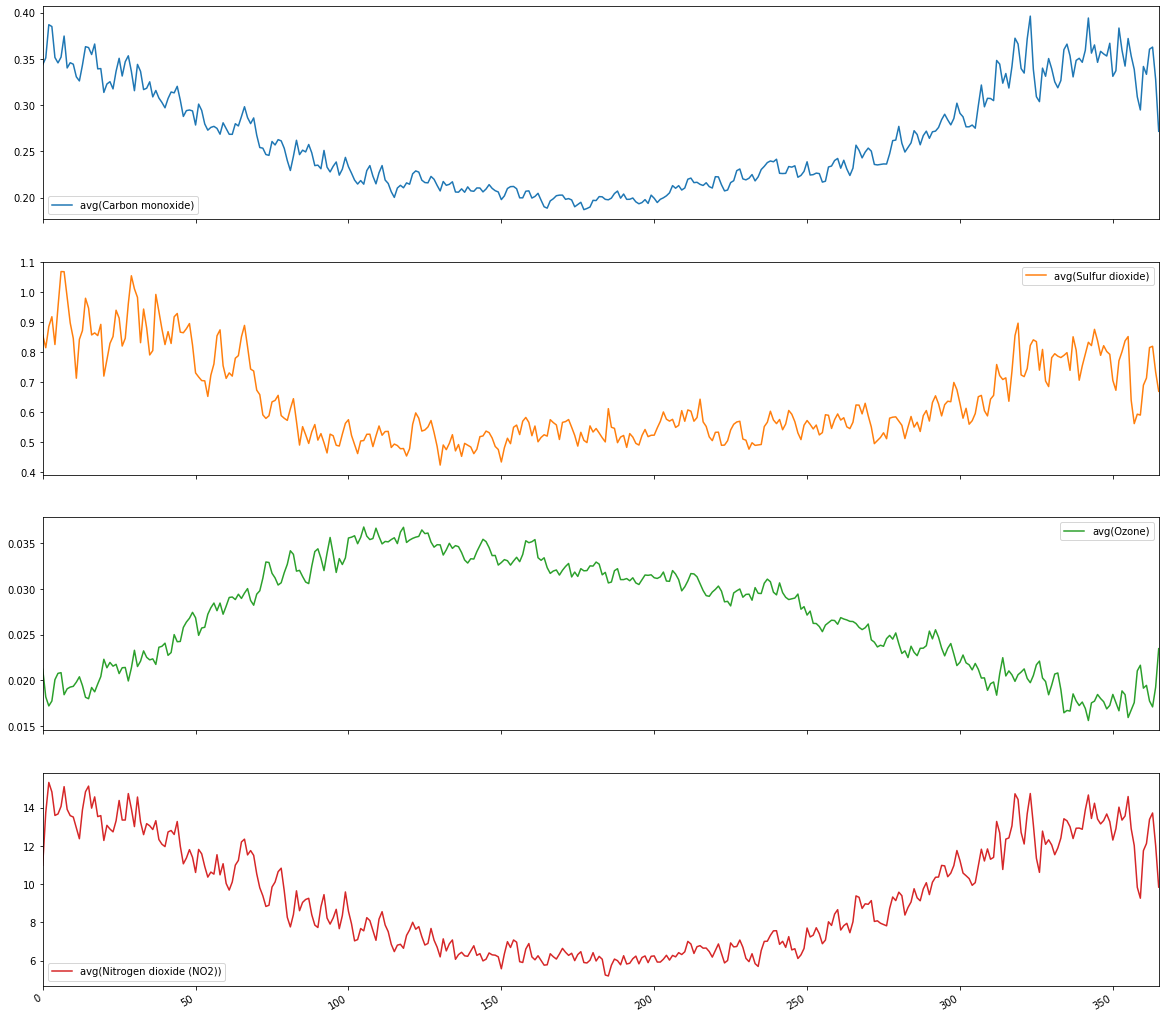

In [7]:
df \
.groupby('dayofyear(dateGMT)') \
.mean() \
.sort_values(by='dayofyear(dateGMT)') \
.drop(['year(dateGMT)'], 1) \
.reset_index(drop=True) \
.plot.line(subplots=True, figsize=(20,20))

# Reconstructing Scaled Feature Vectors

In [8]:
cols = ['avg(Carbon monoxide)',
       'avg(Sulfur dioxide)', 'avg(Ozone)', 'avg(Nitrogen dioxide (NO2))']
arr = df['features'].apply(lambda x: np.array(x[1:-1].split(',')).astype(np.double).tolist()).to_list()

features = pd.DataFrame(arr, columns=cols)
features['day'] = df['dayofyear(dateGMT)']
features

,avg(Carbon monoxide),avg(Sulfur dioxide),avg(Ozone),avg(Nitrogen dioxide (NO2)),day
0,0.173605,0.218948,0.038844,0.263394,71
1,-0.277740,-0.170554,0.439009,-0.352688,181
2,0.000686,-0.147191,0.003611,0.158163,54
3,-0.218013,0.078513,0.264580,-0.184159,209
4,-0.126082,-0.143410,-0.324486,-0.090160,257
...,...,...,...,...,...
1942,-0.029385,0.084093,0.591943,-0.013343,122
1943,-0.054899,-0.304604,0.243882,-0.022253,93
1944,-0.331704,-0.060153,0.084179,-0.310168,197
1945,0.194197,0.548056,-0.108181,0.413404,66


# Day-Averaged Plots of Scaled Features (Exponential Moving Average)

In [9]:
featuresEMA = features
featuresEMA[cols] = features[cols].ewm(span=3).mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2710773d0>,
      dtype=object)

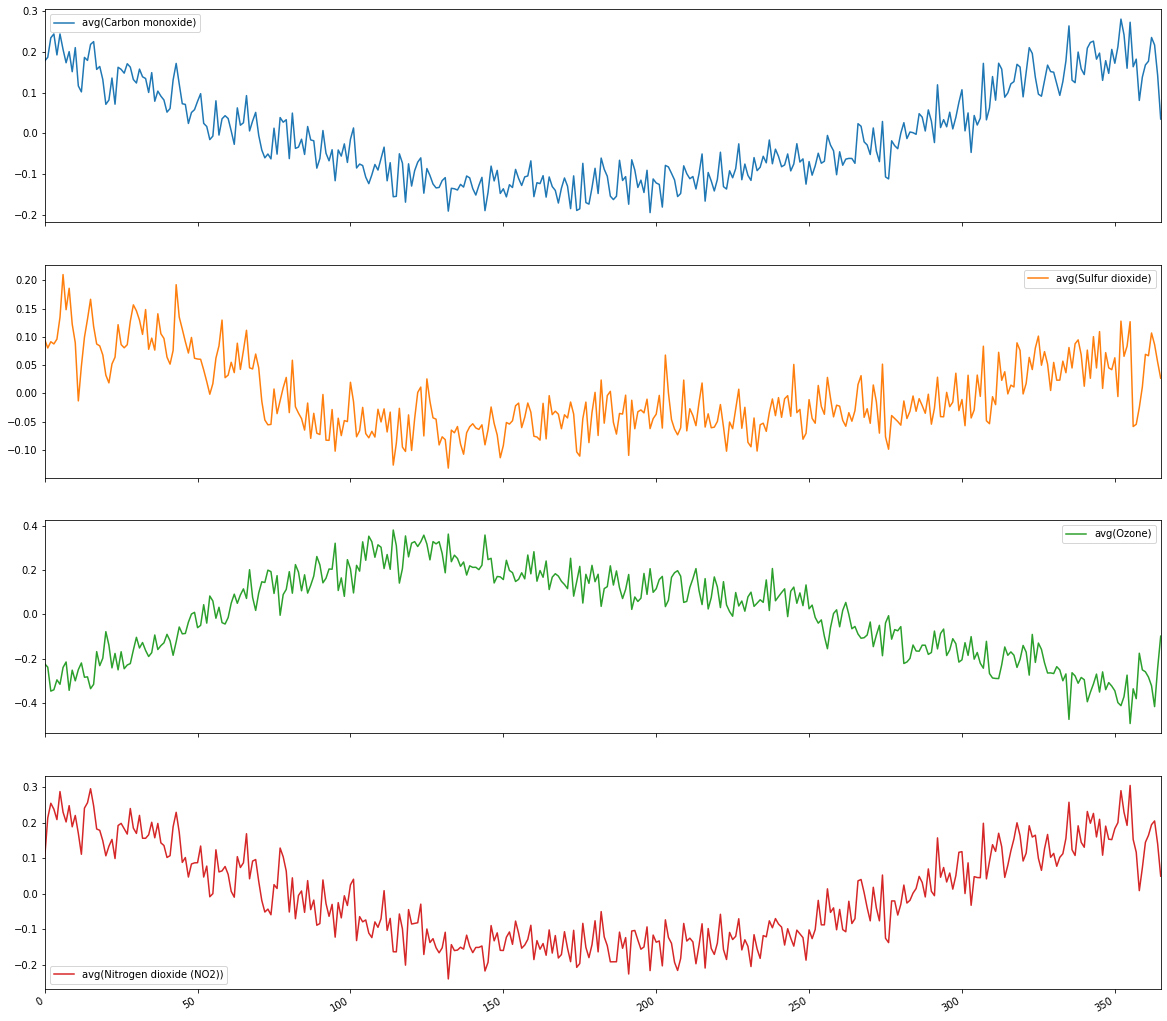

In [10]:
featuresEMA \
.groupby('day') \
.mean() \
.reset_index(drop=True) \
.plot.line(subplots=True, figsize=(20,20))

# Plot of L2-Normed Daily Pollution Vectors

This represents the magnitude of each pollution vector for each averaged day in the year (over 5 years)

This value is intuitively the pollution "badness" of that day on average

In [11]:
magnitudes = [np.linalg.norm(r, 2) for r in features.groupby('day').mean().values]

In [12]:
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

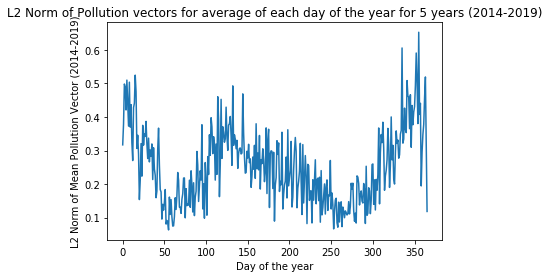

In [13]:
plt.plot(magnitudes)
plt.title("L2 Norm of Pollution vectors for average of each day of the year for 5 years (2014-2019)")
plt.xlabel("Day of the year")
plt.ylabel("L2 Norm of Mean Pollution Vector (2014-2019)")
plt.show()

# Day-Averaged Plots of Scaled Feature Normalized Gradients

In [14]:
# Gradient of Columns
c = [cc for cc in features.columns if cc != "day"]
features[c] = features[c].apply(lambda x : np.gradient(x) / np.sqrt(np.sum(x**2)))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa270d3d8d0>,
      dtype=object)

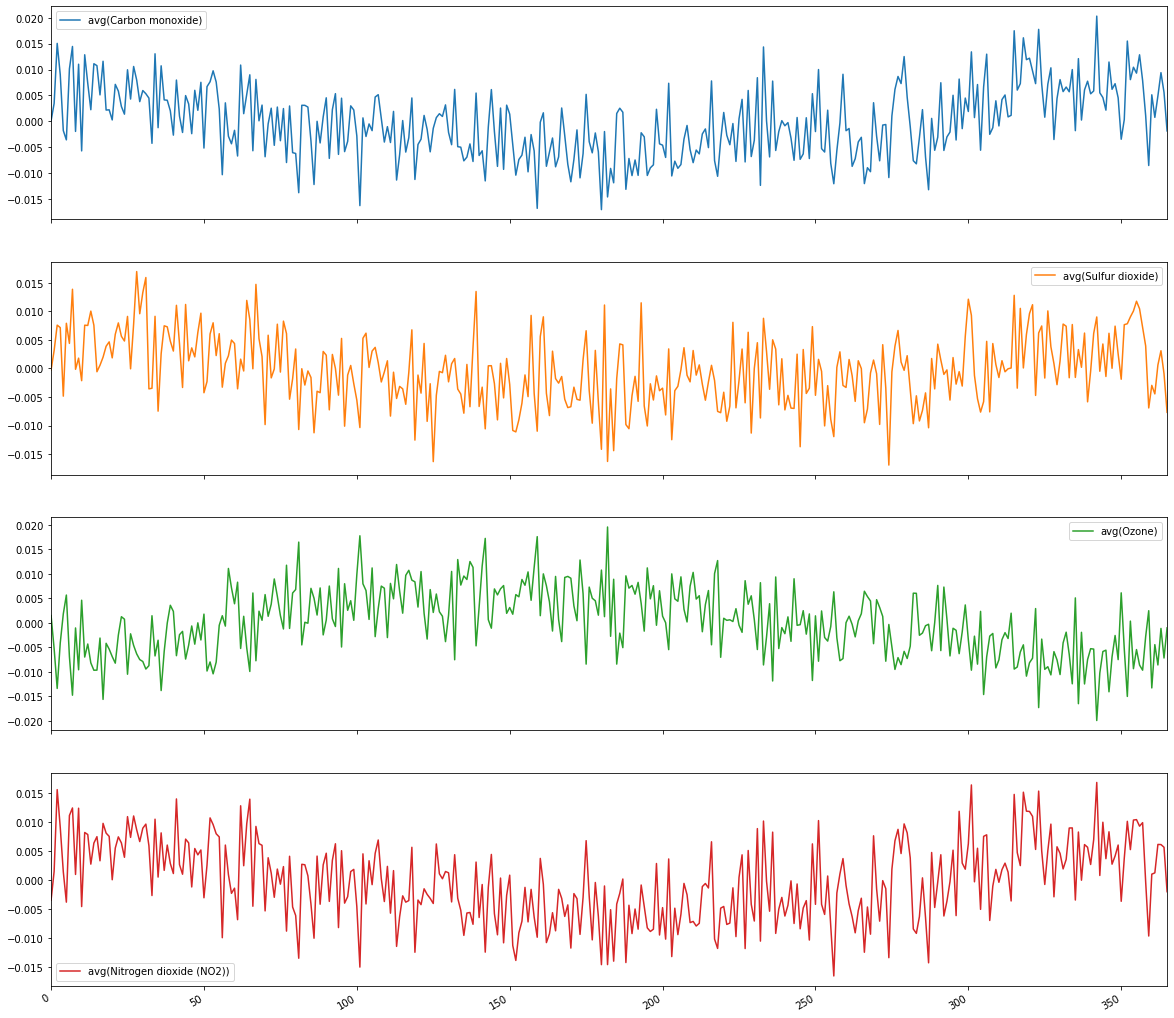

In [15]:
features \
.groupby('day') \
.mean() \
.reset_index(drop=True) \
.plot.line(subplots=True, figsize=(20,20))

In [16]:
features

,avg(Carbon monoxide),avg(Sulfur dioxide),avg(Ozone),avg(Nitrogen dioxide (NO2)),day
0,-0.045888,-0.047203,0.025533,-0.053541,71
1,-0.017368,-0.029132,0.004508,-0.015392,181
2,-0.001087,0.003199,-0.004902,0.004029,54
3,-0.006055,0.002261,-0.009676,-0.007505,209
4,0.002652,-0.010836,0.005387,-0.002577,257
...,...,...,...,...,...
1942,-0.000324,-0.011268,0.016503,0.003167,122
1943,-0.011689,-0.012189,-0.003898,-0.008090,93
1944,0.003653,0.032655,-0.010373,0.010153,197
1945,0.039771,0.021750,-0.022038,0.037853,66
